Your report should:
* Explain your methods and results including why the best and 
    worst solutions performed the way they did and discuss any
    unusual results you find
* Have proper structure with introduction, main body covering
    the various areas you address, and conclusions
*    Have satisfactory technical coverage, balancing breadth of
    coverage with depth
*    Have soundness of argument
*    Have good clarity of expression and level of readability
*    Clearly reference sources of information, and avoid plagiarism
    *Note* for Task 3, you will need to create several sequences of
    different sizes to assess the performance of your search algorithms.


Assessment, things to consider:
* Speed: Test running time as input size grows. Compare
running-time vs time complexity
* Efficiency (operations/capacity): Can you estimate big-O (or
big-theta), capacity requirements
* Clarity: - are class names, method names, variable names
meaningful; is a consistent style used throughout;
code refactored (remove unnecessary or unused variables, loops
etc.)
* Correctness: - does it do what it is meant to do? - is it scaleable?
is it hardcoded
* Maintainability: - Are appropriate comments included in code?
Are unit tests provided to test the key functionality

# Introduction

The following notebook investigates the implementation of three different factorial algorithms, used to find the result of the mathematical factorial function (n!). First, pseudocode was written to compute the factorial. The three unique solutions that were then implemented were : <br>
&emsp; 1. An iterative factorial algorithm <br>
&emsp; 2. Non-tail recursive algorithm <br>
&emsp; 3. Tail-recursive factorial algorithm <br>
The running time of each function was plotted against the input to the function. The running times of each of the three functions were compared. 
<br>
Two different search algorithms were implemented: <br>
&emsp; 1. Linear search <br>
&emsp; 2. Binary search <br>
These two search algorithms were tested on the list of numbers outputted by the iterative factorial algorithm. The running times were plotted against the index of the target. The running times of the two search algorithms were also tested on lists of various lengths. The running times were plotted against the size of the list which was searched over.  <br>
<br>
The equation of the run time for each factorial algorithm and the two search algorithms were estimated using the SciPy Curve Fitting library.


# Task 1

Below: pseudocode for a factorial algorithm

Input: n (positive integer) <br>
Output: $n^{th}$ factorial number <br>
if n = 1 then: <br>
    return 1 <br>
else: <br>
    return n*factorial(n-1) <br>
endif <br>


# Task 2

**to remove** 1 - Write 3 factorial functions to compute the factorial of a
positive integer n. You should create 1 iterative factorial
algorithm, 1 tail-recursive factorial algorithm and 1 non-tail
recursive algorithm
2 - Your algorithm should be able to take in any value of N and
compute the factorial for that value
3 - Execute each algorithms for a large range of input values of n
and save the runtimes for each function call in a list, with the
corresponding value of N.
4 - For each of your algorithms, plot the running time as a
function of n and compare the achieved results for each
algorithm as well as to the complexity of the algorithm
5 - *Note You may see that when you plot these results that you
get spikes so you might want to ru

In [125]:
import matplotlib.pyplot as plt

Implementation of the iterative factorial algorithm:

In [126]:
def iter_factorial(n):
    res = 1
    while n > 1:
        res = n*res
        n -= 1
    return res
        

Implementation of the non-tail-recursive algorithm:

In [127]:
def non_tail_rec_factorial(n):
    if n == 1:
        return 1
    else:
        return n*non_tail_rec_factorial(n-1)
    

Implementation of the tail-recursive algorithm:

In [128]:
def tail_rec_factorial(n, accumulator=1):
    if n == 1:
        return accumulator
    else:
        return tail_rec_factorial(n-1, n*accumulator)

Testing the running time for the iterative factorial function. The timeit module was used to test the running time of the code. The iter_factorial() function was run 5000 times for each input and an average time was taken, to reduce spiking in the graph. The input to the iter_factorial ranged from 1 to 1000 in steps of 20.

In [129]:
import timeit

In [130]:
# iter_factorial() time
iter_times = []
n = []
num = 1000
for i in range(1, 1000, 20):
    tot_time = timeit.timeit('iter_factorial(i)', globals=globals(), number=num)
    avg_time = tot_time/num
    n.append(i)
    iter_times.append(avg_time)

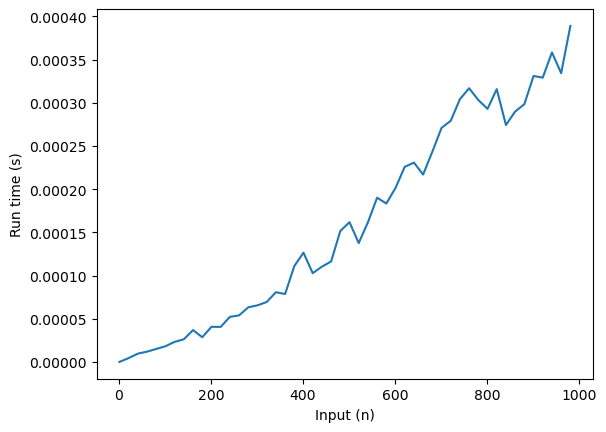

In [131]:
plt.plot(n, iter_times)
plt.xlabel('Input (n)')
plt.ylabel('Run time (s)')
plt.show()

As expected, the run time of the algorithm increases as the input increases. For larger values of input (n), the function will have to perform a larger amount of iterations, thereby increasing running time.

The following code is used to estimate the equation of the running time of the iterative factorial algorithm as a function of the input (n).

In [132]:
import numpy as np
from scipy.optimize import curve_fit

In [133]:
def my_function(x, a0, a1, a2, a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

In [134]:
parameters, covariance = curve_fit(my_function, n, iter_times)

In [135]:
f_a0 = parameters[0]
f_a1 = parameters[1]
f_a2 = parameters[2]
f_a3 = parameters[3]

In [136]:
n = np.asarray(n)

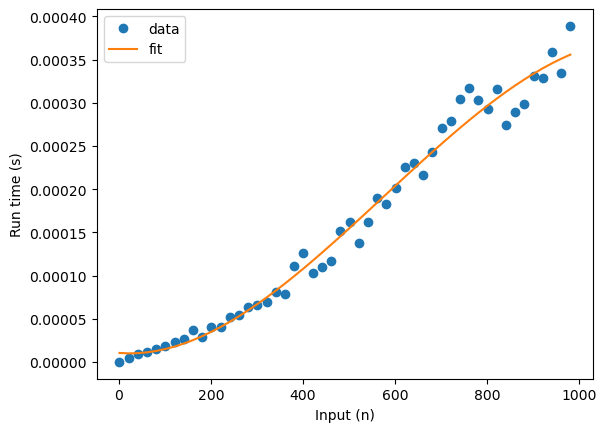

In [137]:
fit_y = my_function(n, f_a0, f_a1, f_a2, f_a3)
plt.plot(n, iter_times, 'o', label='data')
plt.plot(n, fit_y, '-', label='fit')
plt.xlabel('Input (n)')
plt.ylabel('Run time (s)')
plt.legend()

In [138]:
print(parameters)

[ 1.06588325e-05 -4.43055003e-08  9.35037314e-10 -5.41557903e-13]


In [139]:
f_a0 = round(f_a0*10**7, 2)
f_a1 = round(f_a1*10**7, 2)
f_a2 = round(f_a2*10**7, 2)
f_a3 = round(f_a3*10**7, 2)

106.59


In [140]:
print('The equation of the running time of the iterative factorial algorithm is: (', f_a3,'x^3 +',f_a2,'x^2 +',f_a1,'x +',f_a0, ')*10^7')

The equation of the running time of the iterative factorial algorithm is: ( -0.0 x^3 + 0.01 x^2 + -0.44 x + 106.59 )*10^7


From the equation above, it is clear to see that the iterative factorial algorithm has linear time complexity O(n).

Testing the running time for the non_tail_rec_factorial() function. 

In [141]:
# non_tail_rec_factorial() time
iter_times = []
n = []
num = 5000
for i in range(1, 1000, 20):
    # start = timer()
    tot_time = timeit.timeit('non_tail_rec_factorial(i)', globals=globals(), number=num)
    avg_time = tot_time/num
    # end = timer()
    n.append(i)
    iter_times.append(avg_time)

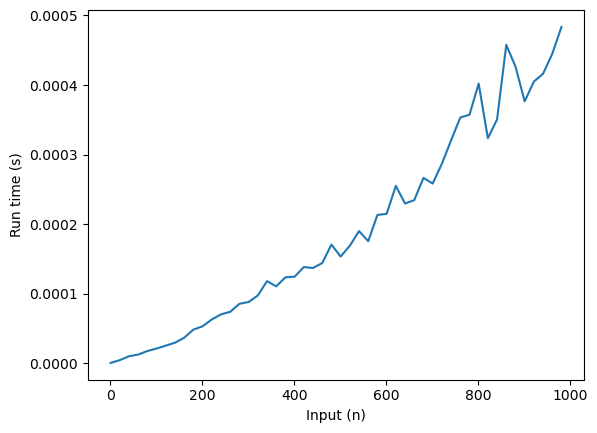

In [142]:
plt.plot(n, iter_times)
plt.xlabel('Input (n)')
plt.ylabel('Run time (s)')
plt.show()

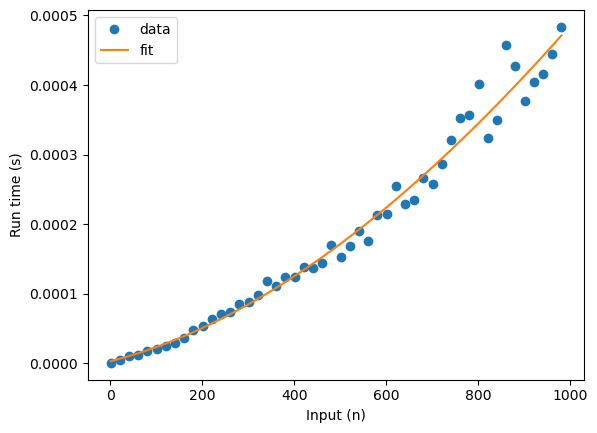

In [143]:
parameters, covariance = curve_fit(my_function, n, iter_times)
n = np.asarray(n)
f_a0 = parameters[0]
f_a1 = parameters[1]
f_a2 = parameters[2]
f_a3 = parameters[3]
fit_y = my_function(n, f_a0, f_a1, f_a2, f_a3)
plt.plot(n, iter_times, 'o', label='data')
plt.plot(n, fit_y, '-', label='fit')
plt.xlabel('Input (n)')
plt.ylabel('Run time (s)')
plt.legend()

In [144]:
print(parameters)

[ 2.56107473e-06  1.68857196e-07  3.60663817e-10 -4.65896687e-14]


In [145]:
f_a0 = round(f_a0*10**7, 2)
f_a1 = round(f_a1*10**7, 2)
f_a2 = round(f_a2*10**7, 2)
f_a3 = round(f_a3*10**7, 2)

In [146]:
print('The equation of the running time of the iterative factorial algorithm is: (', f_a3,'x^3 +',f_a2,'x^2 +',f_a1,'x +',f_a0, ')*10^7')

The equation of the running time of the iterative factorial algorithm is: ( -0.0 x^3 + 0.0 x^2 + 1.69 x + 25.61 )*10^7


From the equation above, it is clear to see that the non-tail-recursive factorial algorithm has linear time complexity O(n).

Testing the running time for the tail_rec_factorial() function:

In [147]:
# tail_rec_factorial() time
iter_times = []
n = []
num = 5000
for i in range(1, 1000, 20):
    # start = timer()
    stmt = iter_factorial(i)
    tot_time = timeit.timeit('tail_rec_factorial(i)', globals=globals(), number=num)
    avg_time = tot_time/num
    # end = timer()
    n.append(i)
    iter_times.append(avg_time)

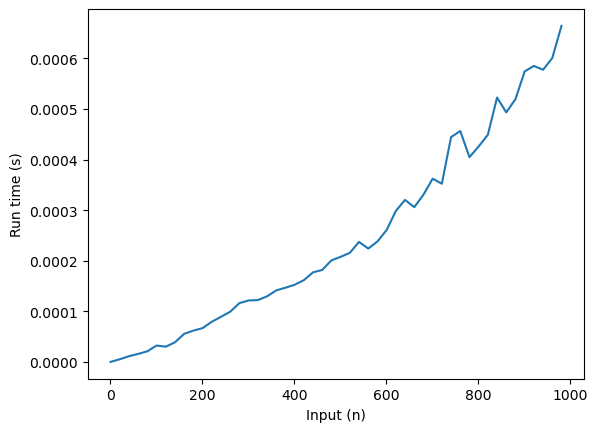

In [148]:
plt.plot(n, iter_times)
plt.xlabel('Input (n)')
plt.ylabel('Run time (s)')
plt.show()

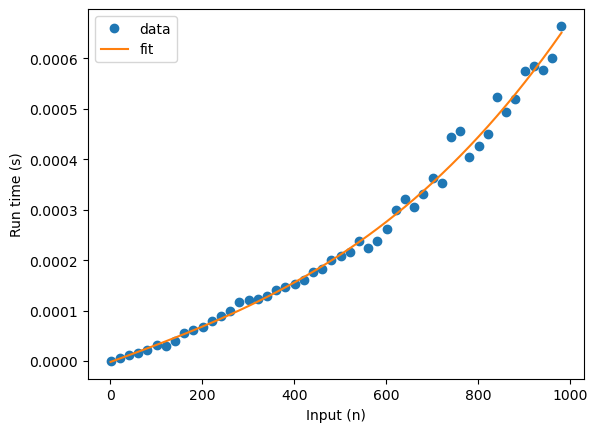

In [149]:
parameters, covariance = curve_fit(my_function, n, iter_times)
n = np.asarray(n)
f_a0 = parameters[0]
f_a1 = parameters[1]
f_a2 = parameters[2]
f_a3 = parameters[3]
fit_y = my_function(n, f_a0, f_a1, f_a2, f_a3)
plt.plot(n, iter_times, 'o', label='data')
plt.plot(n, fit_y, '-', label='fit')
plt.xlabel('Input (n)')
plt.ylabel('Run time (s)')
plt.legend()

In [150]:
print(parameters)

[-1.92690067e-06  3.33182635e-07  2.33334335e-11  3.21066303e-13]


In [151]:
f_a0 = round(f_a0*10**7, 2)
f_a1 = round(f_a1*10**7, 2)
f_a2 = round(f_a2*10**7, 2)
f_a3 = round(f_a3*10**7, 2)

In [152]:
print('The equation of the running time of the iterative factorial algorithm is: (', f_a3,'x^3 +',f_a2,'x^2 +',f_a1,'x +',f_a0, ')*10^7')

The equation of the running time of the iterative factorial algorithm is: ( 0.0 x^3 + 0.0 x^2 + 3.33 x + -19.27 )*10^7


From the equation above, it is clear to see that the non-tail-recursive factorial algorithm has linear time complexity O(n).

For all three factorial algorithms, the time complexity is linear, or O(n). The iterative algorithm is the fastest, followed by the non-tail-recursive algorithm. The tail-recursive algorithm is the slowest of the three. Both recursive functions have repeated function calls, which cause them to be slower than the iterative function. Generally, tail recursion is more efficient, however that is not the case with these factorial functions. **why**

# Task 3

**to remove** 1 - Use one of the sequences obtained from task 2 as an input for
search algorithms.
2 - Implement 1 linear search algorithm
3 - Implement 1 binary search algorithm. You can choose to use
either an iterative or a recursive search
4 - For each approach, compute the best and worst running
times. Give some examples by plotting the running time as a
function of n
5 - Execute each search algorithm multiple times with a range of
search values and storing the performance times
6 - *Note* for your binary search algorithm, you will first have to
sort the sequence you are searching
7 - Use curve-fitting algorithms to find the equation of the
running times obtained from Tasks 1-3. See the attached

*Note* for Task 3, you will need to create several sequences of
different sizes to assess the performance of your search algorithms.


Implementation of the linear search function:

In [153]:
# Linear search function:
def linear_search(target, n):
    for i in range(len(n)):
        if n[i] == target:
            # print('The target number, ', target, ', is in the list. It is at index: ', i)
            return i
    return False# print('The target number, ', target, ', is not in the list.')

In [154]:
target = iter_factorial(99)
linear_search(target, n)

False

Implementation of the binary search function:

In [155]:
def binary_search(target, n):
    l = 0
    r = len(n) - 1
    while l <= r:
        m = (l + r)//2
        if target > n[m]:
            l = m + 1
        elif target < n[m]:
            r = m - 1
        else:
            # print('The target number, ', target, ', is in the list. It is at index: ', m)
            return m
    return False# print('The target number, ', target, ', is not in the list.')
    
        

In [156]:
target = iter_factorial(10)
binary_search(target, n)

False

Testing the running time for the linear_search() function:

In [180]:
n = []
input_to_func = []
for i in range(100):
    n.append(iter_factorial(i))
    input_to_func.append(i)

In [181]:
# plotting running times of linear search
num = 10000
t = []
for target in n:
    tot_time = timeit.timeit('linear_search(target, n)', globals=globals(), number=num)
    avg_time = tot_time/num
    t.append(avg_time)

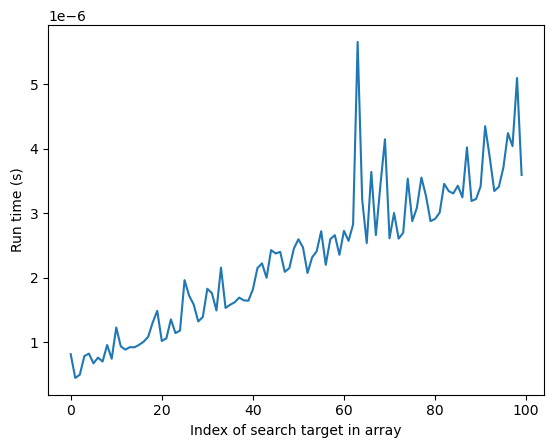

In [182]:
plt.plot(input_to_func, t)
plt.xlabel('Index of search target in array')
plt.ylabel('Run time (s)')
plt.show()

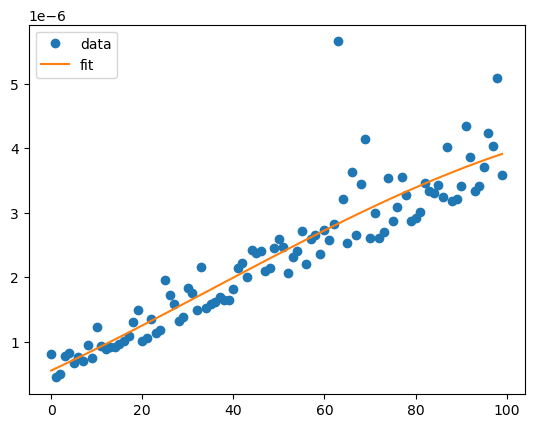

In [183]:
parameters, covariance = curve_fit(my_function, input_to_func, t)
# '''
input_to_func = np.asarray(input_to_func)
f_a0 = parameters[0]
f_a1 = parameters[1]
f_a2 = parameters[2]
f_a3 = parameters[3]
fit_y = my_function(input_to_func, f_a0, f_a1, f_a2, f_a3)
plt.plot(input_to_func, t, 'o', label='data')
plt.plot(input_to_func, fit_y, '-', label='fit')
plt.legend()
# '''

In [184]:
print(parameters)

[ 5.51148014e-07  3.30121042e-08  1.21830154e-10 -1.13467272e-12]


In [185]:
f_a0 = round(f_a0*10**8, 2)
f_a1 = round(f_a1*10**8, 2)
f_a2 = round(f_a2*10**8, 2)
f_a3 = round(f_a3*10**8, 2)

In [186]:
print('The equation of the running time of the iterative factorial algorithm is: (', f_a3,'x^3 +',f_a2,'x^2 +',f_a1,'x +',f_a0, ')*10^7')

The equation of the running time of the iterative factorial algorithm is: ( -0.0 x^3 + 0.01 x^2 + 3.3 x + 55.11 )*10^7


From the above equation and graph it can be seen that the running time of the linear search algorithm varies linearly with the index of the target. This is as expected, as the algorithm checks each element one by one until the target is found. If the target is towards the end of the array, the linear search algorithm will take a long time to find the target. If the target is towards the beginning of the array, it will take a much shorter time to find the target. 

Computing the best and worst running times:

In [187]:
print(min(t))
print(max(t))

4.438700000719109e-07
5.657539999992878e-06


In [188]:
list_of_lists = []
cur_list = [1]

for i in range(2, 100):
    list_of_lists.append(cur_list.copy())
    cur_list.append(iter_factorial(i))

input_to_func = []
for i in range(1, 99):
    input_to_func.append(i)

In [189]:
print(len(list_of_lists))

98


In [190]:
n = []
input_to_func = []
for i in range(98):
    n.append(iter_factorial(i))
    input_to_func.append(i)

The following code investigates the running time of the linear search algorithm when tested on arrays varying from length 1 to length 98. For each array, a random integer contained in the array was selected as the target.

In [191]:
import random

In [194]:
num = 1000
t = []
for cur_array in list_of_lists:
    cur_list.append(iter_factorial(i))
    tot_time = timeit.timeit('linear_search(random.choice(cur_list), cur_array)', globals=globals(), number = num)
    avg_time = tot_time/num
    t.append(avg_time)

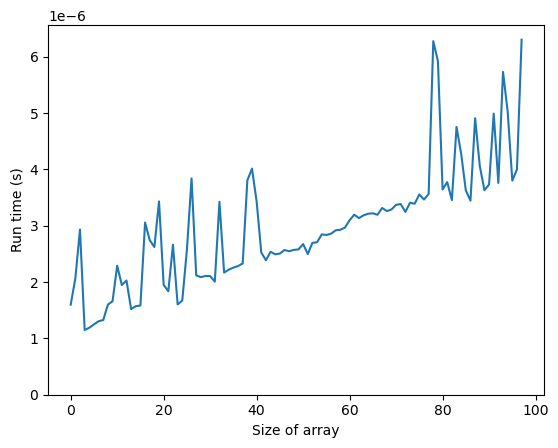

In [195]:
plt.plot(input_to_func, t)
plt.xlabel('Size of array')
plt.ylabel('Run time (s)')
#plt.xscale('log')
plt.ylim(ymin=0)
plt.show()

Computing best and worst case running times.

In [196]:
print(min(t))
print(max(t))

1.148800000009942e-06
6.301999999777763e-06


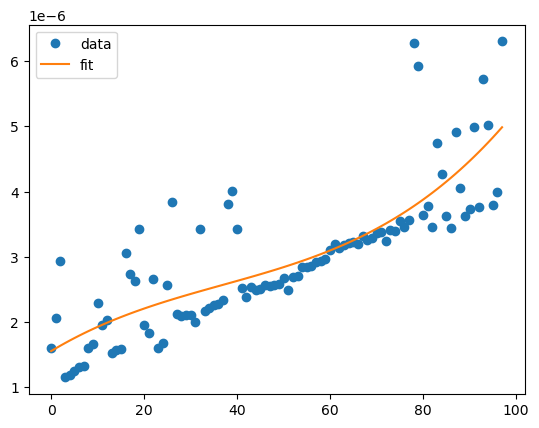

In [205]:
parameters, covariance = curve_fit(my_function, input_to_func, t)
input_to_func = np.asarray(input_to_func)
f_a0 = parameters[0]
f_a1 = parameters[1]
f_a2 = parameters[2]
f_a3 = parameters[3]
fit_y = my_function(input_to_func, f_a0, f_a1, f_a2, f_a3)
plt.plot(input_to_func, t, 'o', label='data')
plt.plot(input_to_func, fit_y, '-', label='fit')
plt.legend()

In [206]:
print(parameters)

[ 1.55359677e-06  4.28161831e-08 -6.23097591e-10  5.63456386e-12]


In [207]:
f_a0 = round(f_a0*10**8, 2)
f_a1 = round(f_a1*10**8, 2)
f_a2 = round(f_a2*10**8, 2)
f_a3 = round(f_a3*10**8, 2)

In [208]:
print('The equation of the running time of the iterative factorial algorithm is: (', f_a3,'x^3 +',f_a2,'x^2 +',f_a1,'x +',f_a0, ')*10^7')

The equation of the running time of the iterative factorial algorithm is: ( 0.0 x^3 + -0.06 x^2 + 4.28 x + 155.36 )*10^7


As can be seen from the graph and equation above, the running time of the linear search algorithm varies linearly with the size of the input array. This gives it a time complexity of O(n). This is as expected. The linear search algorithm compares each element one by one, so as the size of the array being searched increases, so does the running time. There is significant spiking in the graph due to the fact that 

Testing the running time for the binary search function:

In [169]:
n = []
input_to_func = []
for i in range(100):
    n.append(iter_factorial(i))
    input_to_func.append(i)

In [170]:
# plotting running times of binary search
num = 10000
t = []
for target in n:
    tot_time = timeit.timeit('binary_search(target, n)', globals=globals(), number=num)
    avg_time = tot_time/num
    t.append(avg_time)

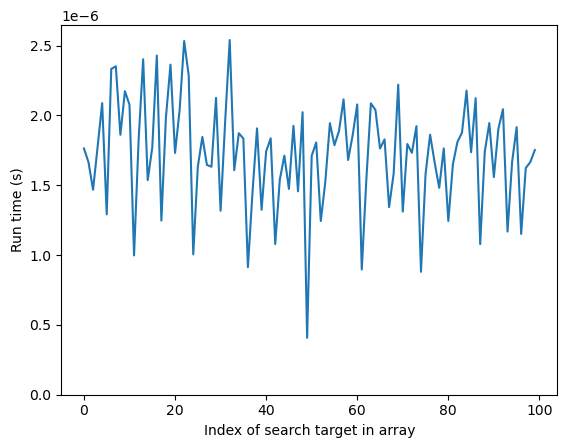

In [171]:
plt.plot(input_to_func, t)
plt.xlabel('Index of search target in array')
plt.ylabel('Run time (s)')
#plt.xscale('log')
plt.ylim(ymin=0)
plt.show()

For binary search, we will examine the running time for the algorithm to find a random element in each list. 

In [172]:
num = 5000
t = []
cur_list = []
for i in range(1, 99):
    cur_list.append(iter_factorial(i))
    tot_time = timeit.timeit('binary_search(random.choice(cur_list), list_of_lists[i-1])', globals=globals(), number = num)
    avg_time = tot_time/num
    t.append(avg_time)

In [173]:
n = []
input_to_func = []
for i in range(98):
    n.append(iter_factorial(i))
    input_to_func.append(i)

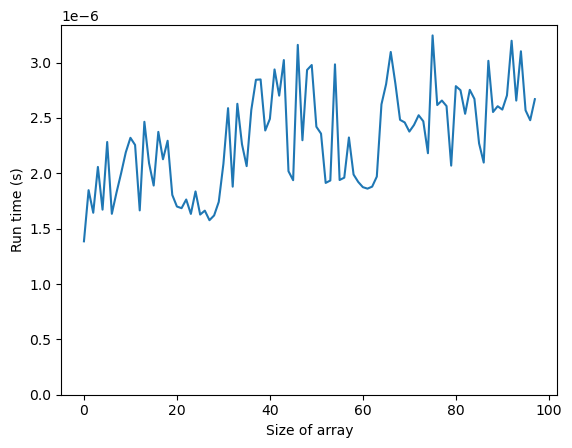

In [174]:
plt.plot(input_to_func, t)
plt.xlabel('Size of array')
plt.ylabel('Run time (s)')
#plt.xscale('log')
plt.ylim(ymin=0)
plt.show()

The graph above is of shape log(n). This is as expected. The running time of the binary search algorithm will increase logarithmically as the size of the input array increases. The running time for the binary search algorithm is significantly lower than that of the linear search algorithm for the larger arrays.

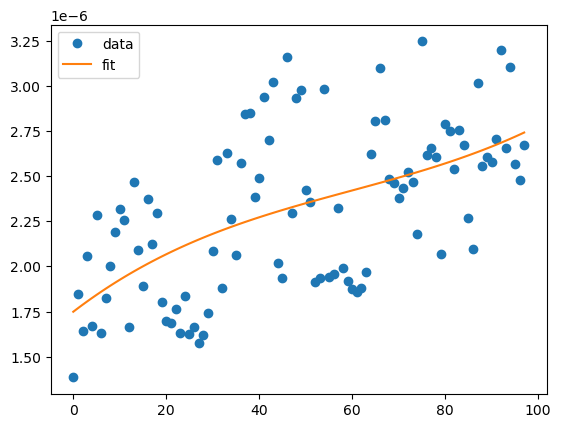

In [175]:
parameters, covariance = curve_fit(my_function, input_to_func, t)
input_to_func = np.asarray(input_to_func)
a0 = parameters[0]
a1 = parameters[1]
a2 = parameters[2]
a3 = parameters[3]
fit_y = my_function(input_to_func, a0, a1, a2, a3)
plt.plot(input_to_func, t, 'o', label='data')
plt.plot(input_to_func, fit_y, '-', label='fit')
plt.legend()

Computing the best and worst running times:

In [176]:
print(min(t))
print(max(t))

1.3855000000148721e-06
3.2452599999487573e-06


The time complexity of any linear search algorithm is O(n), as every element in the array is compared once. The time complexity of the binary search algorithm is O(log(n)). As can be seen above, the running time of the binary search algorithm does not vary as much as that of the linear search algorithm.

**Comment on graphs here** <br> **need to assess arrays of different length here**

The graph shows that the running time of the algorithm increases linearly as the size of the input array increases.

Computing the best and worst running times for each approach

# Task 4

Using curve-fitting algorithms to find the equation of the run times for Tasks 1-3

In [177]:
print(parameters)

[ 1.74936596e-06  1.96995024e-08 -2.13484650e-10  1.19403590e-12]


In [178]:
print(parameters)

[ 1.74936596e-06  1.96995024e-08 -2.13484650e-10  1.19403590e-12]


In [179]:
print(parameters*10**7)

[ 1.74936596e+01  1.96995024e-01 -2.13484650e-03  1.19403590e-05]
